In [206]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()

<img src="Zillow-Logo.png" width=500 height=100>

In [208]:
cf.colors.scales()

In [371]:
zhvi_data = pd.read_csv('https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

In [372]:
zhvi_data.head()

RegionID  SizeRank       RegionName RegionType StateName     2000-01-31  \
0    102001         0    United States    country       NaN  122710.838539   
1    394913         1     New York, NY        msa        NY  218233.216724   
2    753899         2  Los Angeles, CA        msa        CA  222104.914025   
3    394463         3      Chicago, IL        msa        IL  153956.315498   
4    394514         4       Dallas, TX        msa        TX  126111.301852   

      2000-02-29     2000-03-31     2000-04-30     2000-05-31  ...  \
0  122926.726242  123194.458782  123768.692526  124429.566719  ...   
1  219160.584763  220096.541902  221993.153236  223957.159952  ...   
2  222931.426109  224032.332323  226222.765868  228618.413461  ...   
3  154098.834197  154370.263570  155045.512395  155857.755512  ...   
4  126167.472266  126232.045908  126399.736872  126620.832817  ...   

      2023-11-30     2023-12-31     2024-01-31     2024-02-29     2024-03-31  \
0  353806.242676  354242.717001  354677.065211  355473.042348  357021.050068   
1  636475.270504  639265.650987  642178.317205  646255.694516  651704.395720   
2  921146.559682  926554.539271  926708.887683  923740.986284  922618.466845   
3  311275.135372  311913.816691  312578.140750  313972.158826  316395.381263   
4  372438.862159  372112.028509  372133.731174  372616.126553  373774.335129   

      2024-04-30     2024-05-31     2024-06-30     2024-07-31     2024-08-31  
0  358884.957514  360324.712897  360888.668935  361037.327498  361281.717048  
1  657863.854229  662561.428749  665667.764258  668437.168324  672210.970325  
2  926105.996730  932034.718291  936012.934083  940417.087163  945635.978294  
3  319279.856054  321409.733463  322638.674660  323378.146509  324304.487366  
4  374743.310085  374887.158218  374222.635105  373283.837228  372632.458458  

[5 rows x 301 columns]

In [373]:
zhvi_processed = zhvi_data.melt(id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'],
                                var_name='date', value_name='zhvi')

In [374]:
zhvi_processed

RegionID  SizeRank       RegionName RegionType StateName        date  \
0         102001         0    United States    country       NaN  2000-01-31   
1         394913         1     New York, NY        msa        NY  2000-01-31   
2         753899         2  Los Angeles, CA        msa        CA  2000-01-31   
3         394463         3      Chicago, IL        msa        IL  2000-01-31   
4         394514         4       Dallas, TX        msa        TX  2000-01-31   
...          ...       ...              ...        ...       ...         ...   
264915    753929       935       Zapata, TX        msa        TX  2024-08-31   
264916    394743       936    Ketchikan, AK        msa        AK  2024-08-31   
264917    753874       937        Craig, CO        msa        CO  2024-08-31   
264918    395188       938       Vernon, TX        msa        TX  2024-08-31   
264919    394767       939       Lamesa, TX        msa        TX  2024-08-31   

                 zhvi  
0       122710.838539  
1       218233.216724  
2       222104.914025  
3       153956.315498  
4       126111.301852  
...               ...  
264915  119660.131384  
264916  390474.629213  
264917  288493.671932  
264918   91640.824659  
264919   86270.290243  

[264920 rows x 7 columns]

In [377]:
zhvi_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264920 entries, 0 to 264919
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   RegionID    264920 non-null  int64         
 1   SizeRank    264920 non-null  int64         
 2   RegionName  264920 non-null  object        
 3   RegionType  264920 non-null  object        
 4   StateName   264624 non-null  object        
 5   date        264920 non-null  datetime64[ns]
 6   zhvi        215654 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 14.1+ MB


In [376]:
zhvi_processed['date'] = pd.to_datetime(zhvi_processed['date'], format="%Y-%m-%d")

In [378]:
zhvi_processed['yoy_growth'] = zhvi_processed.groupby('RegionName')['zhvi'].pct_change(12, fill_method=None)

In [379]:
zhvi_processed.tail(20)

RegionID  SizeRank       RegionName RegionType StateName       date  \
264900    394805       916   Los Alamos, NM        msa        NM 2024-08-31   
264901    394678       918     Hereford, TX        msa        TX 2024-08-31   
264902    394330       920      Andrews, TX        msa        TX 2024-08-31   
264903    395112       922  Spirit Lake, IA        msa        IA 2024-08-31   
264904    394594       923   Fitzgerald, GA        msa        GA 2024-08-31   
264905    753927       924   Winnemucca, NV        msa        NV 2024-08-31   
264906    394841       925    Maysville, KY        msa        KY 2024-08-31   
264907    395104       926       Snyder, TX        msa        TX 2024-08-31   
264908    394676       927       Helena, AR        msa        AR 2024-08-31   
264909    395111       928      Spencer, IA        msa        IA 2024-08-31   
264910    394342       929     Atchison, KS        msa        KS 2024-08-31   
264911    753880       930    Fairfield, IA        msa        IA 2024-08-31   
264912    395186       932   Vermillion, SD        msa        SD 2024-08-31   
264913    395142       933   Sweetwater, TX        msa        TX 2024-08-31   
264914    394968       934        Pecos, TX        msa        TX 2024-08-31   
264915    753929       935       Zapata, TX        msa        TX 2024-08-31   
264916    394743       936    Ketchikan, AK        msa        AK 2024-08-31   
264917    753874       937        Craig, CO        msa        CO 2024-08-31   
264918    395188       938       Vernon, TX        msa        TX 2024-08-31   
264919    394767       939       Lamesa, TX        msa        TX 2024-08-31   

                 zhvi  yoy_growth  
264900  560849.907845    0.084006  
264901  161706.481227    0.057732  
264902  223800.003106    0.037967  
264903  387549.589762    0.044246  
264904  112965.909463    0.035075  
264905  314057.263109    0.047124  
264906  149538.827004    0.079239  
264907  121259.194352    0.005802  
264908   48361.093712   -0.007859  
264909  185247.376200    0.020204  
264910  166044.661539    0.096647  
264911  176964.638293    0.039134  
264912  258599.953084    0.056295  
264913  107500.343725   -0.034877  
264914  149169.986836   -0.089372  
264915  119660.131384   -0.036096  
264916  390474.629213   -0.018384  
264917  288493.671932    0.019104  
264918   91640.824659   -0.042474  
264919   86270.290243   -0.003698

In [380]:
zhvi_processed.isna().sum()

RegionID          0
SizeRank          0
RegionName        0
RegionType        0
StateName       296
date              0
zhvi          49266
yoy_growth    60438
dtype: int64

In [266]:
# https://www.kaggle.com/datasets/robikscube/zillow-home-value-index/data?select=ZHVI.parquet
data = pd.read_parquet('ZHVI.parquet')

In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 296 entries, 2000-01-01 to 2024-08-01
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Virginia                  296 non-null    float64
 1   California                296 non-null    float64
 2   Florida                   296 non-null    float64
 3   New York                  296 non-null    float64
 4   New Jersey                296 non-null    float64
 5   Texas                     296 non-null    float64
 6   Michigan                  296 non-null    float64
 7   Massachusetts             296 non-null    float64
 8   Arizona                   295 non-null    float64
 9   Washington                296 non-null    float64
 10  Colorado                  296 non-null    float64
 11  Illinois                  296 non-null    float64
 12  the District of Columbia  296 non-null    float64
 13  Nevada                    296 non-null    floa

In [3]:
data.head()

Virginia     California        Florida       New York  \
2000-01-01  124221.089506  188275.958362  106961.891667  153909.362354   
2000-02-01  124542.527988  188908.810055  107193.581081  154457.430871   
2000-03-01  124883.328235  189763.314808  107474.434834  154985.035203   
2000-04-01  125527.327356  191618.189838  108045.338277  156119.768693   
2000-05-01  126149.037966  193774.202640  108660.996118  157293.812224   

               New Jersey          Texas       Michigan  Massachusetts  \
2000-01-01  169782.623604  111198.886345  117557.986101  195594.357299   
2000-02-01  170240.297980  111259.314692  117622.734233  196247.381793   
2000-03-01  170676.999964  111288.623387  117859.781604  197024.377894   
2000-04-01  171644.527155  111434.085040  118331.979034  198554.732577   
2000-05-01  172630.845053  111528.288287  119028.332431  200211.266155   

                  Arizona     Washington  ...      Kentucky      Missouri  \
2000-01-01  134715.019862  175214.568876  ...  85119.394817  96693.956145   
2000-02-01  134959.028367  175609.789734  ...  85163.341543  96807.288912   
2000-03-01  135273.071795  176012.950196  ...  85243.300812  96976.966460   
2000-04-01  135914.330376  176826.631076  ...  85442.006910  97364.811252   
2000-05-01  136641.206047  177714.712596  ...  85706.092827  97865.794315   

                  Kansas       Delaware  Wyoming      Oklahoma   South Dakota  \
2000-01-01  88880.317061  148518.072189      NaN  81843.357765  109129.711149   
2000-02-01  88897.764436  148749.132224      NaN  81877.118358  108897.846566   
2000-03-01  89000.554521  149036.822766      NaN  82034.487297  108573.369238   
2000-04-01  89154.218545  149694.764519      NaN  82321.047885  108136.008600   
2000-05-01  89385.853304  150445.176371      NaN  82705.943318  107954.053794   

                 Nebraska          Iowa           Ohio  
2000-01-01  115831.381330  91848.073983  106354.477198  
2000-02-01  116016.542581  92023.591340  106419.469431  
2000-03-01  116188.153006  92189.287083  106518.033598  
2000-04-01  116454.544459  92547.185353  106807.866287  
2000-05-01  116589.634091  92942.607678  107249.789064  

[5 rows x 51 columns]

In [4]:
data.tail()

Virginia     California        Florida       New York  \
2024-04-01  388150.186052  762606.132080  397461.483333  469934.999142   
2024-05-01  390701.010520  767107.477123  397585.968031  473340.845381   
2024-06-01  392231.260877  769586.691119  396800.208344  476079.434087   
2024-07-01  393152.581174  771588.777855  395744.000060  478639.847998   
2024-08-01  394085.498610  773362.949193  394728.246243  481772.746035   

               New Jersey          Texas       Michigan  Massachusetts  \
2024-04-01  522364.319195  302502.899202  244936.056964  617687.621749   
2024-05-01  526726.468787  302834.243755  246596.824494  622199.138596   
2024-06-01  529722.491208  302602.645842  247571.517629  624943.634292   
2024-07-01  532334.715721  302042.125885  247877.288637  626873.988941   
2024-08-01  535469.482787  301627.091751  248176.142617  628998.225214   

                  Arizona     Washington  ...       Kentucky       Missouri  \
2024-04-01  431154.392929  586298.367977  ...  204833.422272  245080.481945   
2024-05-01  432406.884355  589473.903064  ...  206429.869020  246050.153019   
2024-06-01  432665.386993  590823.137849  ...  207583.845179  246662.892094   
2024-07-01  432295.148713  591374.991158  ...  208063.351821  247140.030785   
2024-08-01  431491.793126  591887.950357  ...  208391.352336  247753.281742   

                   Kansas       Delaware        Wyoming       Oklahoma  \
2024-04-01  224656.640840  386767.053441  350658.861929  204772.936453   
2024-05-01  226386.269590  388204.203857  352036.903013  205591.558154   
2024-06-01  227715.133303  388475.728332  352802.747116  206085.852379   
2024-07-01  228843.156187  388060.509241  353327.917166  206309.959371   
2024-08-01  230020.831728  388163.019783  354755.582672  206699.332356   

             South Dakota       Nebraska           Iowa           Ohio  
2024-04-01  305464.723187  259818.567859  218653.146830  227190.154230  
2024-05-01  306644.924042  260881.239571  220238.416406  229038.483625  
2024-06-01  306938.698782  261277.652341  221129.766780  230286.672133  
2024-07-01  306882.260601  261472.614096  221398.109082  231117.344554  
2024-08-01  307124.612891  261707.824811  221508.543016  231710.317736  

[5 rows x 51 columns]

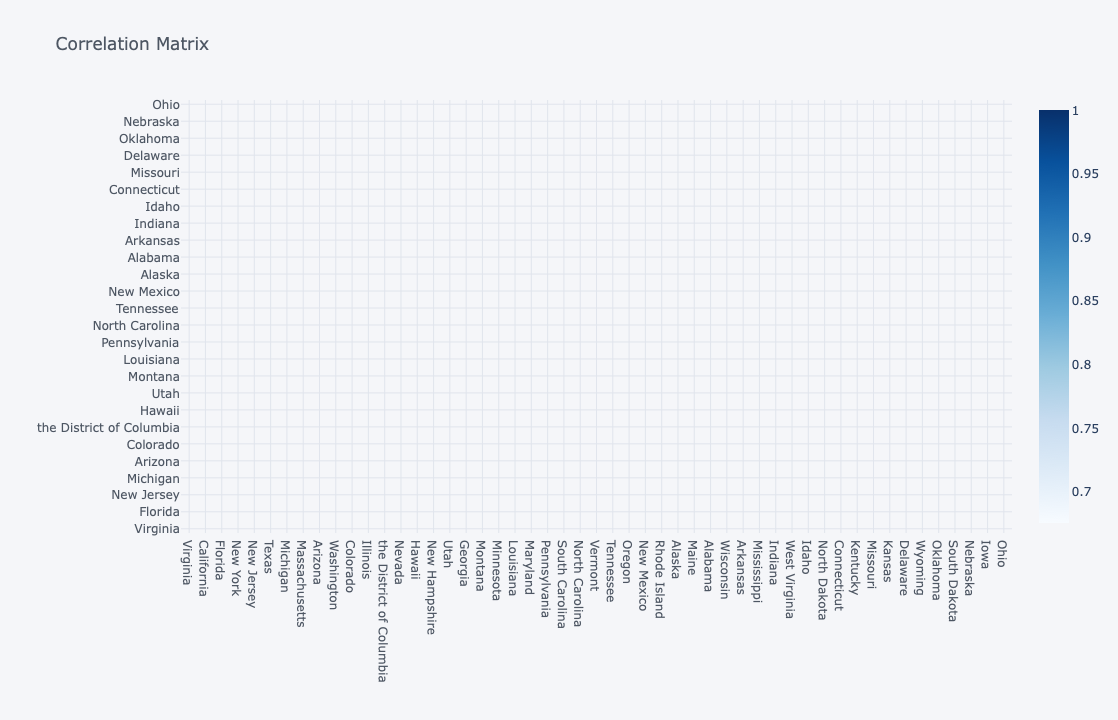

In [207]:
corr_matrix = data.corr()
corr_matrix.iplot(kind='heatmap', 
                  title='Correlation Matrix', 
                  dimensions=(1080, 720),
                 colorscale='blues')

In [52]:
??data.iplot

Signature:
data.iplot(
    kind='scatter',
    data=None,
    layout=None,
    filename='',
    sharing=None,
    title='',
    xTitle='',
    yTitle='',
    zTitle='',
    theme=None,
    colors=None,
    colorscale=None,
    fill=False,
    width=None,
    dash='solid',
    mode='',
    interpolation='linear',
    symbol='circle',
    size=12,
    barmode='',
    sortbars=False,
    bargap=None,
    bargroupgap=None,
    bins=None,
    histnorm='',
    histfunc='count',
    orientation='v',
    boxpoints=False,
    annotations=None,
    keys=False,
    bestfit=False,
    bestfit_colors=None,
    mean=False,
    mean_colors=None,
    categories='',
    x='',
    y='',
    z='',
    text='',
    gridcolor=None,
    zerolinecolor=None,
    margin=None,
    labels=None,
    values=None,
    secondary_y='',
    secondary_y_title='',
    subplots=False,
    shape=None,
    error_x=None,
    error_y=None,
    error_type='data',
    locations=None,
    lon=None,
    lat=None,
    asFrame=Fal

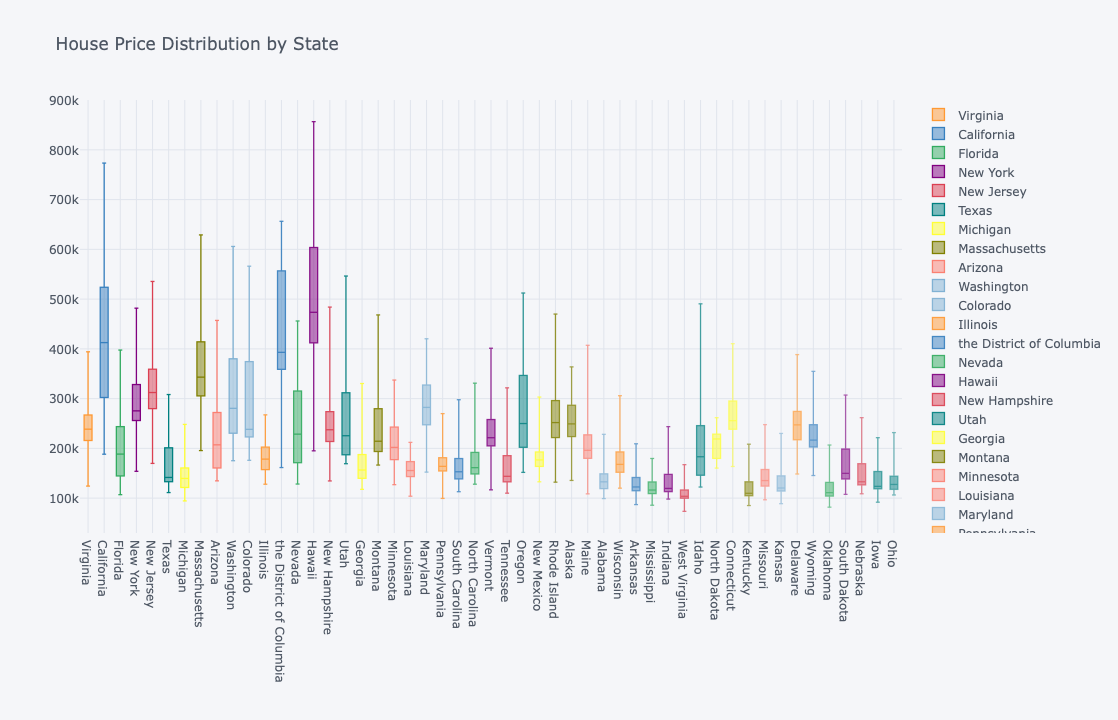

In [61]:
data.iplot(kind='box', 
            title='House Price Distribution by State', 
            x='House Price', 
            y='State',
          dimensions=(1080,720))

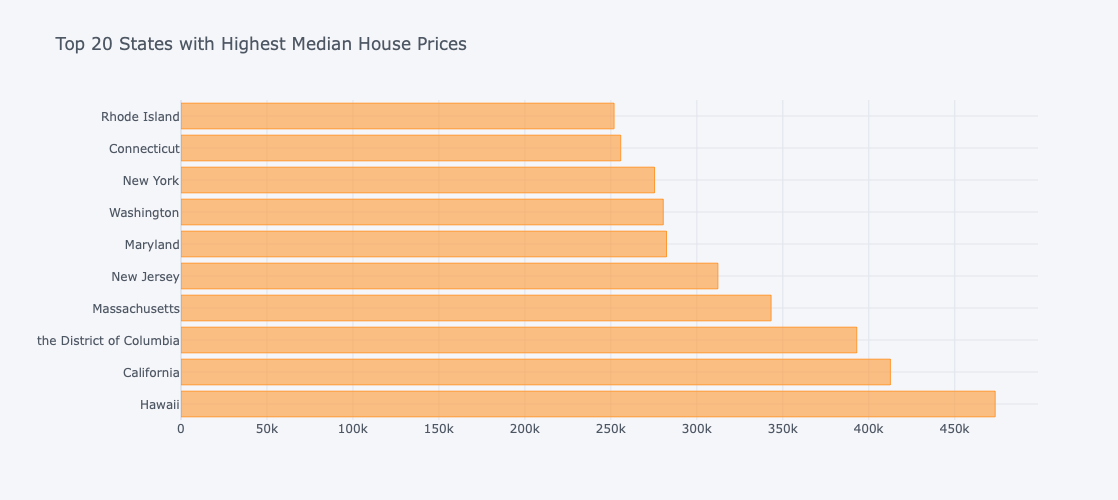

In [107]:
top_10_states = data.median().nlargest(10)
top_10_states.iplot(kind='bar', orientation='h', 
                     title='Top 20 States with Highest Median House Prices',
                   dimensions=(900,500))

In [157]:
corr_matrix = data.corr()
least_correlated_states = corr_matrix.unstack().sort_values(ascending=True).head(10)
columns_to_plot = least_correlated_states.index.get_level_values(0)
columns_to_plot

Index(['Connecticut', 'North Dakota', 'Alaska', 'Michigan', 'Alaska', 'Nevada',
       'Connecticut', 'the District of Columbia', 'Michigan', 'Louisiana'],
      dtype='object')

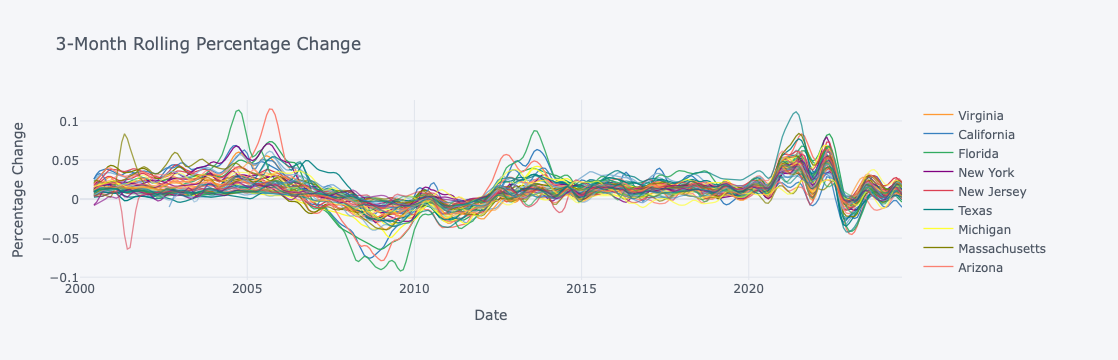

In [210]:
rolling_pct_change_3m = rolling_returns.pct_change(periods=3,fill_method=None)
rolling_pct_change_3m.iplot(kind='line', title='3-Month Rolling Percentage Change', 
                            xTitle='Date', yTitle='Percentage Change')

In [213]:
??data.iplot

Signature:
data.iplot(
    kind='scatter',
    data=None,
    layout=None,
    filename='',
    sharing=None,
    title='',
    xTitle='',
    yTitle='',
    zTitle='',
    theme=None,
    colors=None,
    colorscale=None,
    fill=False,
    width=None,
    dash='solid',
    mode='',
    interpolation='linear',
    symbol='circle',
    size=12,
    barmode='',
    sortbars=False,
    bargap=None,
    bargroupgap=None,
    bins=None,
    histnorm='',
    histfunc='count',
    orientation='v',
    boxpoints=False,
    annotations=None,
    keys=False,
    bestfit=False,
    bestfit_colors=None,
    mean=False,
    mean_colors=None,
    categories='',
    x='',
    y='',
    z='',
    text='',
    gridcolor=None,
    zerolinecolor=None,
    margin=None,
    labels=None,
    values=None,
    secondary_y='',
    secondary_y_title='',
    subplots=False,
    shape=None,
    error_x=None,
    error_y=None,
    error_type='data',
    locations=None,
    lon=None,
    lat=None,
    asFrame=Fal

In [251]:
data.columns

Index(['Virginia', 'California', 'Florida', 'New York', 'New Jersey', 'Texas',
       'Michigan', 'Massachusetts', 'Arizona', 'Washington', 'Colorado',
       'Illinois', 'the District of Columbia', 'Nevada', 'Hawaii',
       'New Hampshire', 'Utah', 'Georgia', 'Montana', 'Minnesota', 'Louisiana',
       'Maryland', 'Pennsylvania', 'South Carolina', 'North Carolina',
       'Vermont', 'Tennessee', 'Oregon', 'New Mexico', 'Rhode Island',
       'Alaska', 'Maine', 'Alabama', 'Wisconsin', 'Arkansas', 'Mississippi',
       'Indiana', 'West Virginia', 'Idaho', 'North Dakota', 'Connecticut',
       'Kentucky', 'Missouri', 'Kansas', 'Delaware', 'Wyoming', 'Oklahoma',
       'South Dakota', 'Nebraska', 'Iowa', 'Ohio'],
      dtype='object')

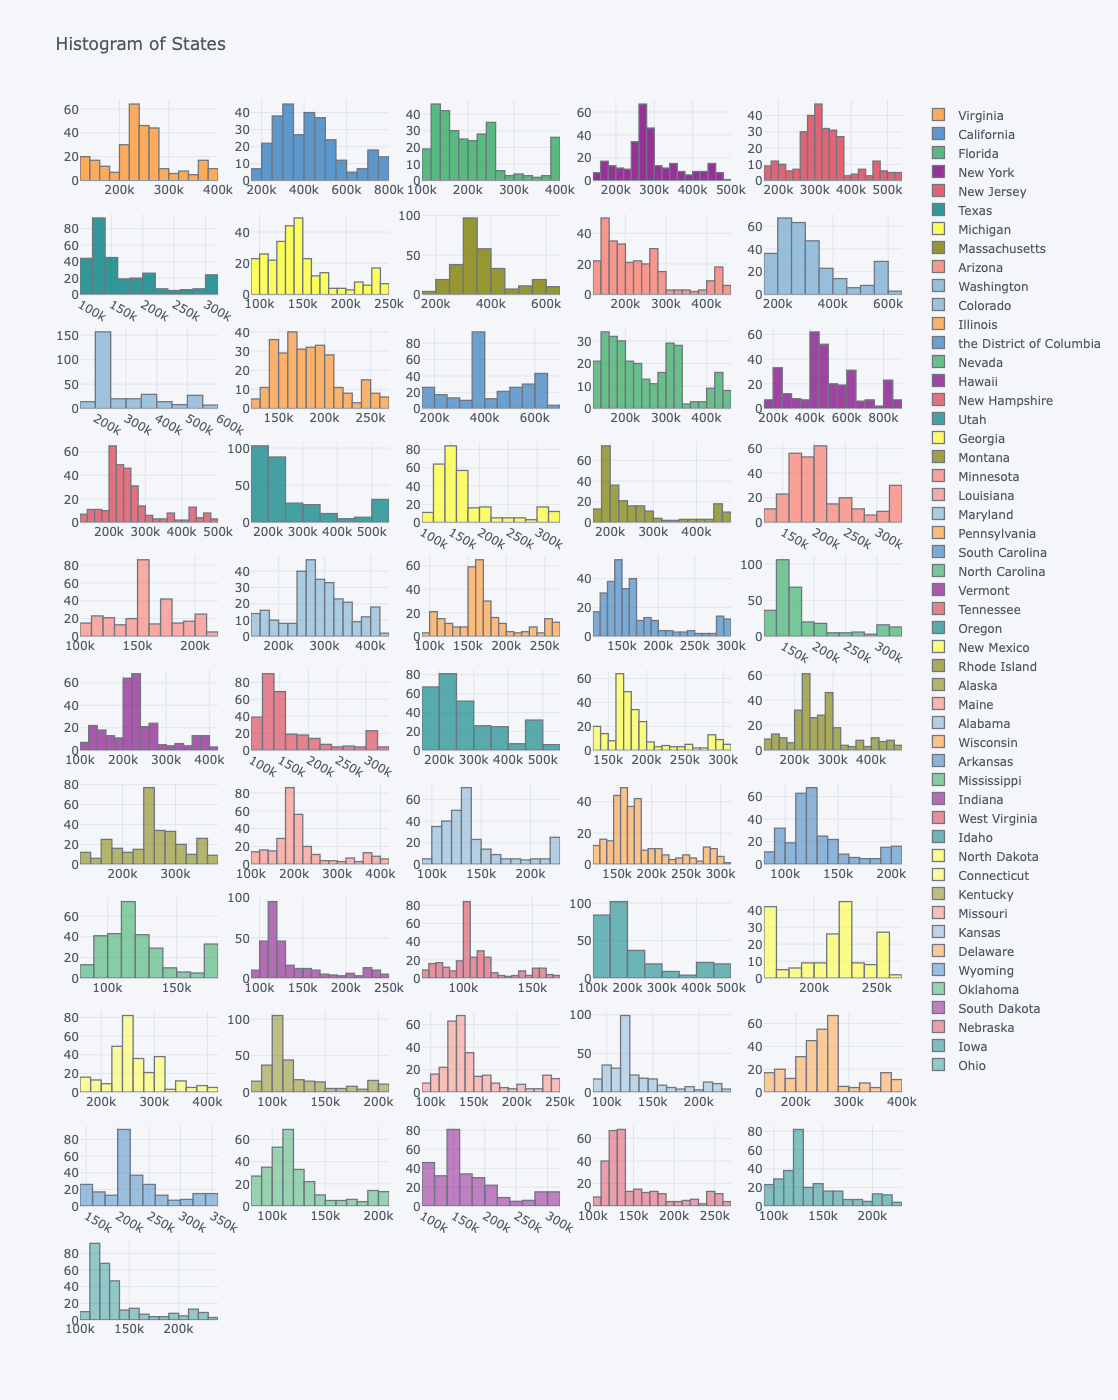

In [261]:
data.iplot(kind='hist', subplots=True, title='Histogram of States',shape = (11,5),
           dimensions=(1180,1400))

In [230]:
pre_gfc = data.loc['2000-01-01':'2006-12-31']
gfc = data.loc['2007-01-01':'2008-12-31']
post_gfc = data.loc['2009-01-01':'2024-12-31']

pre_gfc_medians = pre_gfc.median(axis=0)
gfc_medians = gfc.median(axis=0)
post_gfc_medians = post_gfc.median(axis=0)

median_prices = pd.DataFrame({'pre_gfc Median': pre_gfc_medians, 
                              'gfc Median': gfc_medians,
                              'post_gfc Median': post_gfc_medians})

In [384]:
cf.colors.scales()

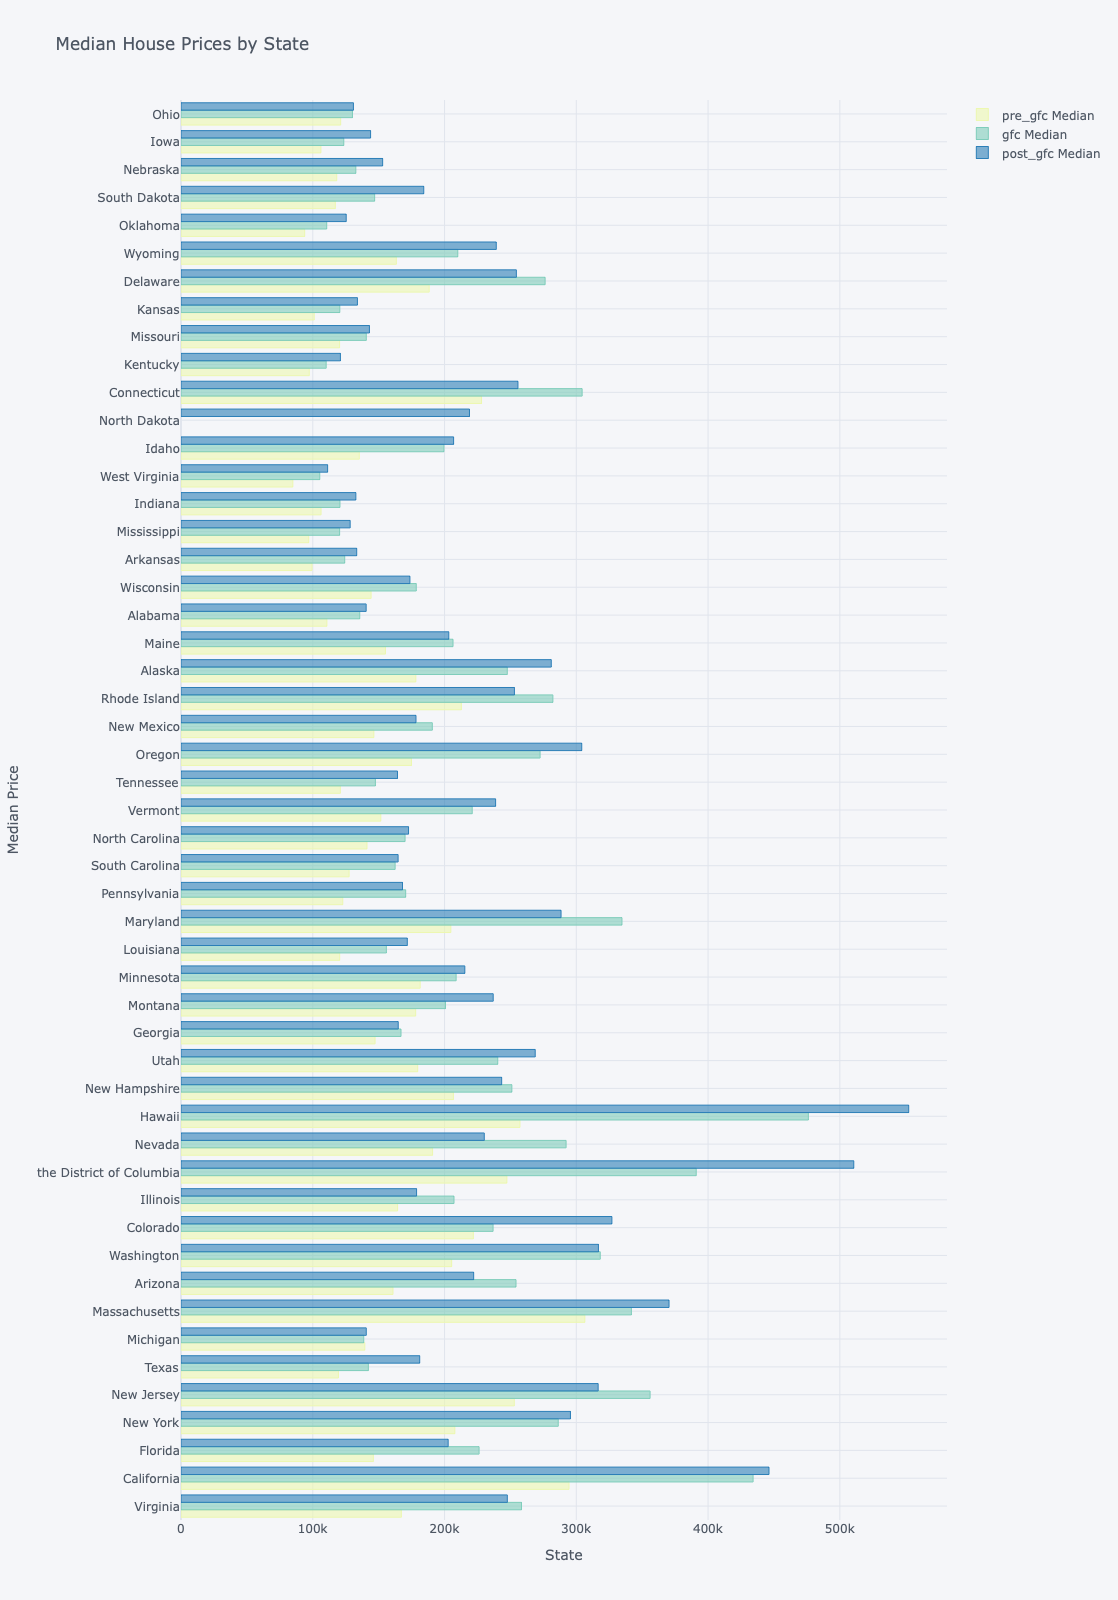

In [388]:
median_prices.iplot(kind='bar', xTitle='State', yTitle='Median Price', title='Median House Prices by State',
                   dimensions=(1080,1600),orientation='h',colorscale = 'ylgnbu')